## Question 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.linear_model import LinearRegression
from scipy.stats import ttest_ind, gaussian_kde


In [2]:
df = pd.read_csv('zillow_feature_sample.csv')

In [3]:
df.head()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,12833975,NaN,NaN,NaN,3.0,4.0,NaN,6.0,3.0,NaN,...,NaN,NaN,155403.0,304592.0,2016.0,149189.0,3708.29,NaN,NaN,6.037409e+13
1,11070096,1.0,NaN,NaN,4.0,4.0,NaN,7.0,4.0,NaN,...,NaN,NaN,493070.0,821783.0,2016.0,328713.0,10087.59,NaN,NaN,6.037108e+13
2,12752672,1.0,NaN,NaN,2.0,3.0,NaN,6.0,2.0,NaN,...,NaN,NaN,126695.0,247962.0,2016.0,121267.0,3377.86,NaN,NaN,6.037504e+13
3,11338563,NaN,NaN,NaN,3.0,4.0,NaN,7.0,3.0,NaN,...,NaN,NaN,130500.0,308900.0,2016.0,178400.0,3578.92,NaN,NaN,6.037920e+13
4,17098704,NaN,NaN,NaN,0.0,3.0,NaN,NaN,NaN,NaN,...,1.0,NaN,142271.0,223101.0,2016.0,80830.0,2564.86,NaN,NaN,6.111000e+13


In [4]:
df.shape

(10000, 58)

In [5]:
missing_values = df.isnull().sum()

In [6]:
missing_values

parcelid                           0
airconditioningtypeid           7219
architecturalstyletypeid        9987
basementsqft                    9996
bathroomcnt                       13
bedroomcnt                        13
buildingclasstypeid             9961
buildingqualitytypeid           3530
calculatedbathnbr                388
decktypeid                      9932
finishedfloor1squarefeet        9305
calculatedfinishedsquarefeet     149
finishedsquarefeet12             859
finishedsquarefeet13            9974
finishedsquarefeet15            9388
finishedsquarefeet50            9305
finishedsquarefeet6             9928
fips                              13
fireplacecnt                    8953
fullbathcnt                      388
garagecarcnt                    6978
garagetotalsqft                 6978
hashottuborspa                  9827
heatingorsystemtypeid           3757
latitude                          13
longitude                         13
lotsizesquarefeet                925
p

In [7]:
df[['taxvaluedollarcnt', 'structuretaxvaluedollarcnt', 'landtaxvaluedollarcnt', 'yearbuilt']]

,taxvaluedollarcnt,structuretaxvaluedollarcnt,landtaxvaluedollarcnt,yearbuilt
0,304592.0,155403.0,149189.0,1955.0
1,821783.0,493070.0,328713.0,2012.0
2,247962.0,126695.0,121267.0,1957.0
3,308900.0,130500.0,178400.0,2006.0
4,223101.0,142271.0,80830.0,1987.0
...,...,...,...,...
9995,399915.0,259395.0,140520.0,2000.0
9996,98658.0,73738.0,24920.0,1957.0
9997,520000.0,130500.0,389500.0,1958.0
9998,167805.0,112656.0,55149.0,1979.0


In [8]:
# Fill missing numerical values with the median
for column in ['taxvaluedollarcnt', 'structuretaxvaluedollarcnt', 'landtaxvaluedollarcnt']:
    df[column].fillna(df[column].median(), inplace=True)
    
df['decade'] = (df['yearbuilt'] // 10) * 10
summary_table = df.groupby('decade')[['taxvaluedollarcnt', 'structuretaxvaluedollarcnt', 
                                      'landtaxvaluedollarcnt']].agg(['mean', 'median', 'std'])
summary_table

taxvaluedollarcnt                          structuretaxvaluedollarcnt  \
                    mean     median           std                       mean   
decade                                                                         
1860.0      2.600588e+06  2600588.0           NaN              104023.000000   
1880.0      4.738152e+05   450008.0  2.343921e+05              141027.250000   
1890.0      2.982841e+05   195041.5  2.100909e+05              100655.400000   
1900.0      2.947590e+05   254328.0  2.328035e+05              114436.281553   
1910.0      3.970185e+05   252592.0  7.240961e+05              124393.658228   
1920.0      4.307278e+05   279054.0  6.367015e+05              135383.991085   
1930.0      4.996180e+05   336282.0  5.925838e+05              174301.759312   
1940.0      3.666715e+05   290651.0  3.331836e+05              124408.232416   
1950.0      3.571612e+05   279524.0  4.597407e+05              119723.350732   
1960.0      3.950789e+05   326192.0  3.893111e+05              146665.118030   
1970.0      3.895420e+05   319514.0  3.150314e+05              154778.619817   
1980.0      4.605599e+05   336441.0  7.681176e+05              213281.678254   
1990.0      5.798582e+05   448403.0  5.270886e+05              277108.885533   
2000.0      7.761330e+05   565401.0  7.714013e+05              379240.373708   
2010.0      9.812827e+05   695630.0  1.158552e+06              453156.620253   

                                landtaxvaluedollarcnt             \
          median            std                  mean     median   
decade                                                             
1860.0  104023.0            NaN          2.496565e+06  2496565.0   
1880.0  128322.0   83936.496493          3.327880e+05   283388.5   
1890.0   38199.5  110791.408959          1.976287e+05   152385.0   
1900.0   75057.0  112924.130537          1.803227e+05   146301.0   
1910.0   73706.0  197842.060825          2.726249e+05   166412.0   
1920.0   90344.0  185075.855143          2.955343e+05   172972.0   
1930.0  105911.0  236973.065579          3.253162e+05   218224.0   
1940.0   96446.0  109301.246999          2.423761e+05   182248.0   
1950.0   94593.5  110286.009524          2.375543e+05   168479.0   
1960.0  119182.0  133617.226417          2.484299e+05   176607.0   
1970.0  128733.0   96348.946041          2.345602e+05   164449.0   
1980.0  164501.0  249683.993876          2.474779e+05   164252.0   
1990.0  215433.0  222067.519580          3.033025e+05   207846.0   
2000.0  277159.0  374061.966060          3.969843e+05   265066.0   
2010.0  332221.0  465686.462670          5.302986e+05   369210.0   

                       
                  std  
decade                 
1860.0            NaN  
1880.0  226589.896822  
1890.0  136610.951629  
1900.0  148736.981612  
1910.0  553421.014607  
1920.0  483498.193651  
1930.0  398038.632866  
1940.0  251917.652893  
1950.0  393790.398199  
1960.0  300714.159256  
1970.0  255075.031439  
1980.0  541410.137313  
1990.0  354577.358541  
2000.0  480896.876449  
2010.0  830147.326747

## Question 2

In [9]:
df['poolcnt']

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
9995    1.0
9996    NaN
9997    NaN
9998    1.0
9999    NaN
Name: poolcnt, Length: 10000, dtype: float64

In [10]:
latest_assessment_year = df['assessmentyear'].max()  # Find the latest assessment year
df['Age'] = latest_assessment_year - df['yearbuilt']  # Calculate the age of each property

# Develop a binary feature 'HasPool'
df['HasPool'] = df['poolcnt'].apply(lambda x: 1 if x > 0 else 0)  # 1 if there is a pool, else 0

# Display the head of the dataframe to confirm the new features
df['HasPool'].value_counts()

0    8162
1    1838
Name: HasPool, dtype: int64

In [13]:
df['assessmentyear'].value_counts()

2016.0    9976
2014.0       6
2015.0       5
Name: assessmentyear, dtype: int64

In [14]:
df['Age'].describe()

count    9834.000000
mean       51.467562
std        23.690129
min         1.000000
25%        35.000000
50%        53.000000
75%        66.000000
max       155.000000
Name: Age, dtype: float64

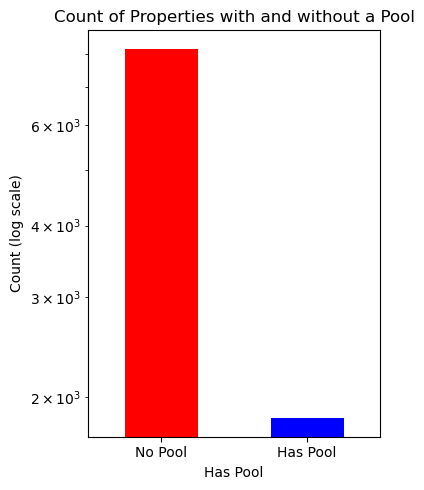

In [12]:
pool_counts = df['HasPool'].value_counts()

# Plotting the bar chart
plt.figure(figsize=(4, 5))
pool_counts.plot(kind='bar', logy=True, color = ['red', 'blue'])  # Set log scale for y-axis
plt.title('Count of Properties with and without a Pool')
plt.xlabel('Has Pool')
plt.ylabel('Count (log scale)')
plt.xticks(ticks=[0, 1], labels=['No Pool', 'Has Pool'], rotation=0)  # Set custom x-axis labels
plt.tight_layout()
plt.show()

## Question 3

In [15]:
# Step 1: Calculate the Pearson correlation coefficient
for column in ['bedroomcnt', 'bathroomcnt']:
    df[column].fillna(df[column].median(), inplace=True)

bed_bath_pears_corr = np.corrcoef(df['bedroomcnt'], df['bathroomcnt'])[0,1]
print(f"Pearson correlation coefficient between bedrooms and bathrooms: {bed_bath_pears_corr}")

Pearson correlation coefficient between bedrooms and bathrooms: 0.6995759331687951


In [17]:
df['bedroomcnt'].value_counts()

3.0     3981
4.0     2431
2.0     2009
5.0      612
0.0      393
1.0      299
6.0      162
7.0       49
8.0       42
9.0       13
11.0       4
10.0       4
12.0       1
Name: bedroomcnt, dtype: int64

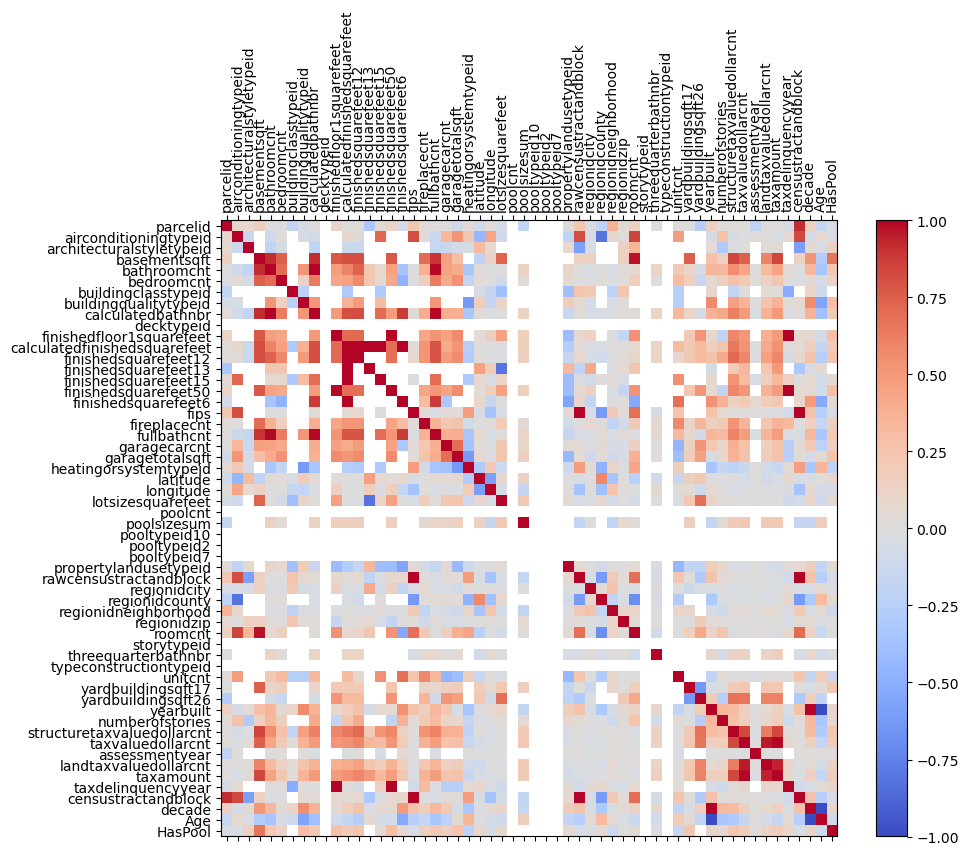

In [18]:
# Select only the numerical features from your DataFrame. This list might change based on your actual DataFrame.
numerical_features = df.select_dtypes(include=[np.number]).columns.tolist()

# Calculate the correlation matrix
corr_matrix = df[numerical_features].corr()

# Now, let's use matplotlib to plot a heatmap
fig, ax = plt.subplots(figsize=(10, 8))
cax = ax.matshow(corr_matrix, cmap='coolwarm')
fig.colorbar(cax)

# Set ticks and labels
ax.set_xticks(np.arange(len(corr_matrix.columns)))
ax.set_yticks(np.arange(len(corr_matrix.columns)))
ax.set_xticklabels(corr_matrix.columns, rotation=90)
ax.set_yticklabels(corr_matrix.columns)

# Display the heatmap
plt.show()


## Question 4

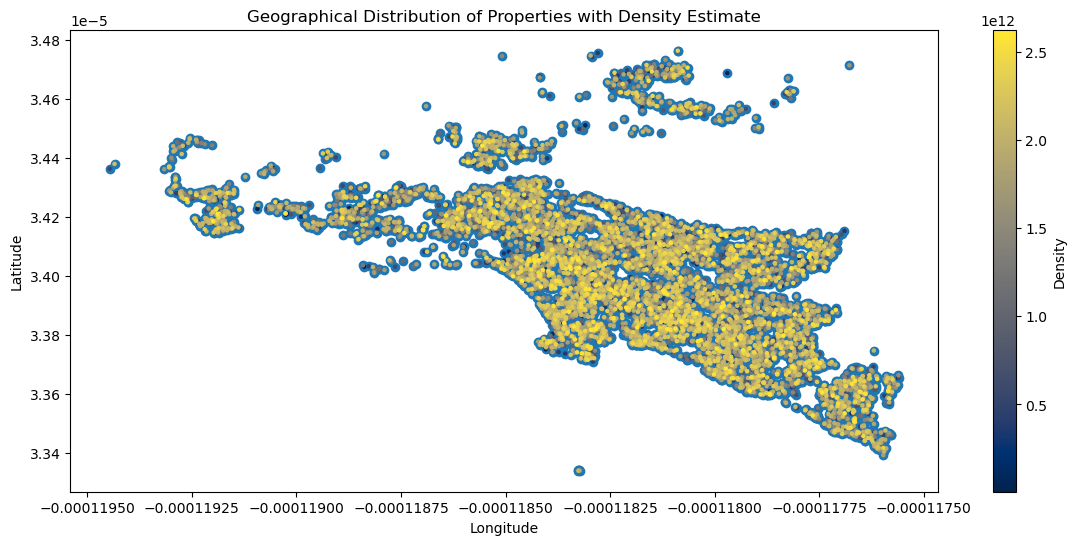

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde


# Convert latitude and longitude from e6 format to standard format if needed
df['latitude'] = df['latitude'] / 1e6
df['longitude'] = df['longitude'] / 1e6

# Create a scatter plot of latitude and longitude
plt.figure(figsize=(14, 6))
plt.scatter(df['longitude'], df['latitude'])

# Calculate the point density
xy = np.vstack([df['longitude'].dropna(), df['latitude'].dropna()])
z = gaussian_kde(xy)(xy)

# Sort the points by density, so that the densest points are plotted last
sorted_idx = z.argsort()
x, y, z = df['longitude'][sorted_idx], df['latitude'][sorted_idx], z[sorted_idx]

# Overlay the density estimate
plt.scatter(x, y, c=z, s=5, cmap='cividis')

# Add labels and title
plt.colorbar(label='Density')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geographical Distribution of Properties with Density Estimate')

# Show the plot
plt.show()

## Question 5

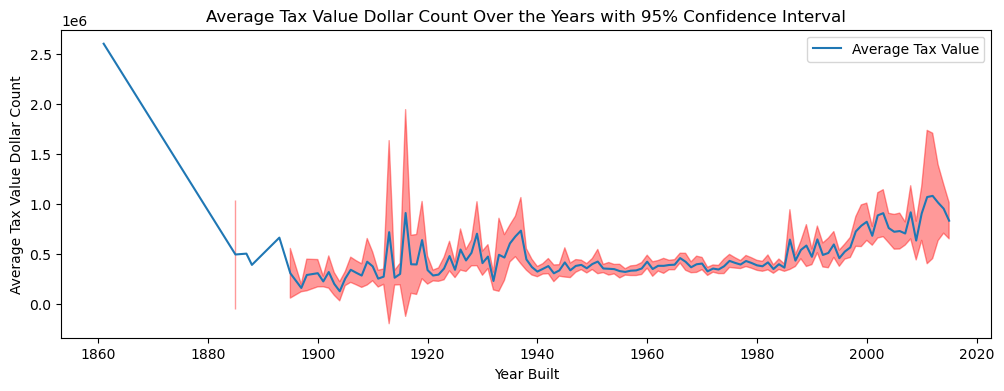

In [21]:
# Group the data by 'yearbuilt' and calculate the mean and standard deviation
grouped_year = df.groupby('yearbuilt')['taxvaluedollarcnt'].agg(['mean', 'std', 'count'])
grouped_year['mean_se'] = grouped_year['std'] / np.sqrt(grouped_year['count'])  # Standard error of the mean
grouped_year['ci95'] = 1.96 * grouped_year['mean_se']  # 95% confidence interval

# Plotting the line chart with confidence intervals
plt.figure(figsize=(12, 4))
plt.plot(grouped_year.index, grouped_year['mean'], label='Average Tax Value')
plt.fill_between(grouped_year.index, grouped_year['mean'] - grouped_year['ci95'], grouped_year['mean'] + grouped_year['ci95'], color='r', alpha=0.4)
plt.xlabel('Year Built')
plt.ylabel('Average Tax Value Dollar Count')
plt.title('Average Tax Value Dollar Count Over the Years with 95% Confidence Interval')
plt.legend()
plt.show()

In [22]:
grouped_year

,mean,std,count,mean_se,ci95
yearbuilt,,,,,
1861.0,2.600588e+06,NaN,1,NaN,NaN
1885.0,4.976225e+05,3.952960e+05,2,279516.500000,547852.340000
1887.0,5.061010e+05,NaN,1,NaN,NaN
1888.0,3.939150e+05,NaN,1,NaN,NaN
1893.0,6.657420e+05,NaN,1,NaN,NaN
...,...,...,...,...,...
2011.0,1.070881e+06,1.663184e+06,24,339495.927502,665412.017904
2012.0,1.082261e+06,1.777329e+06,31,319217.684178,625666.660989
2013.0,1.014304e+06,9.253842e+05,23,192955.945296,378193.652781


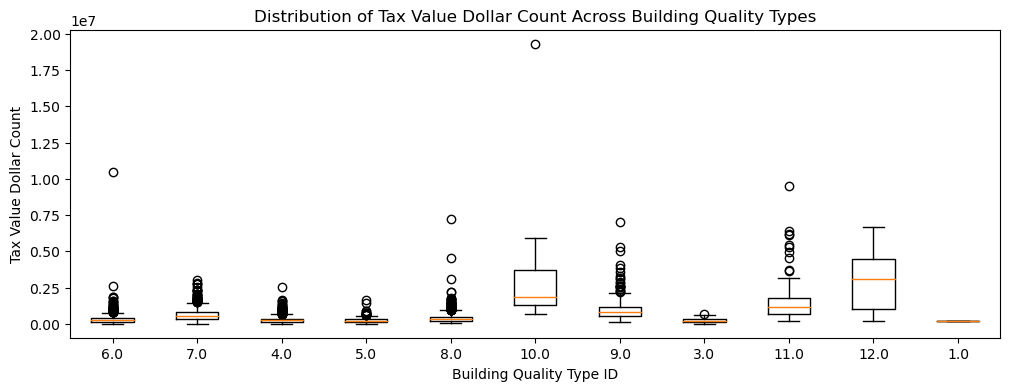

In [23]:
# Creating a boxplot for 'taxvaluedollarcnt' across different 'buildingqualitytypeid'
plt.figure(figsize=(12, 4))

# Extract unique building quality types
building_quality_types = df['buildingqualitytypeid'].dropna().unique()

# Collect the tax values for each building quality type
tax_values = [df[df['buildingqualitytypeid'] == bqt]['taxvaluedollarcnt'] for bqt in building_quality_types]

plt.boxplot(tax_values, labels=building_quality_types)
plt.xlabel('Building Quality Type ID')
plt.ylabel('Tax Value Dollar Count')
plt.title('Distribution of Tax Value Dollar Count Across Building Quality Types')
plt.show()

## Question 6

R-squared: 0.9807457707605431


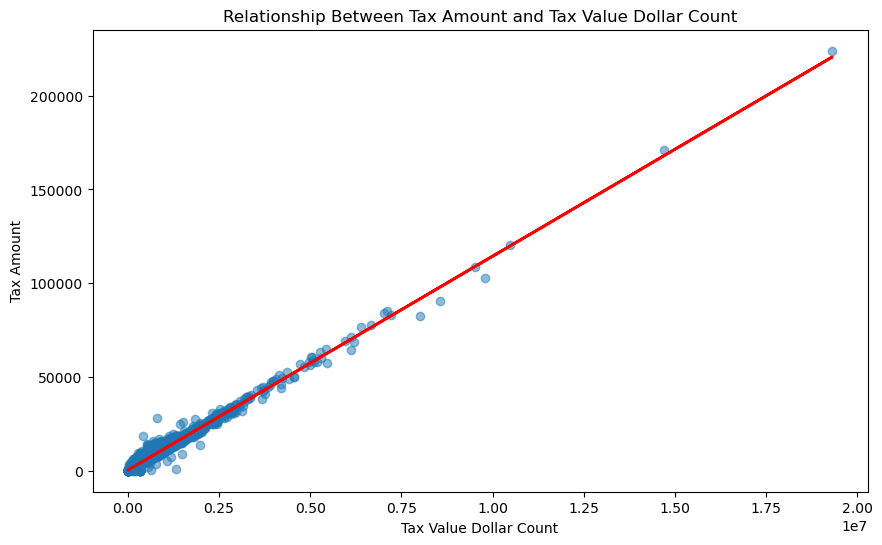

In [24]:
# Scatter plot of 'taxvaluedollarcnt' vs 'taxamount'
plt.figure(figsize=(10, 6))
plt.scatter(df['taxvaluedollarcnt'], df['taxamount'], alpha=0.5)

# Fit a linear regression line
m, b = np.polyfit(df['taxvaluedollarcnt'].fillna(0), df['taxamount'].fillna(0), 1)
plt.plot(df['taxvaluedollarcnt'], m * df['taxvaluedollarcnt'] + b, color='red', linewidth = 2)

plt.xlabel('Tax Value Dollar Count')
plt.ylabel('Tax Amount')
plt.title('Relationship Between Tax Amount and Tax Value Dollar Count')

# Show the plot
#plt.show()

# Calculate the R-squared value
correlation_matrix = np.corrcoef(df['taxvaluedollarcnt'].fillna(df['taxvaluedollarcnt'].median()), 
                                 df['taxamount'].fillna(df['taxamount'].median()))
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2

print(f'R-squared: {r_squared}')

## Question 7

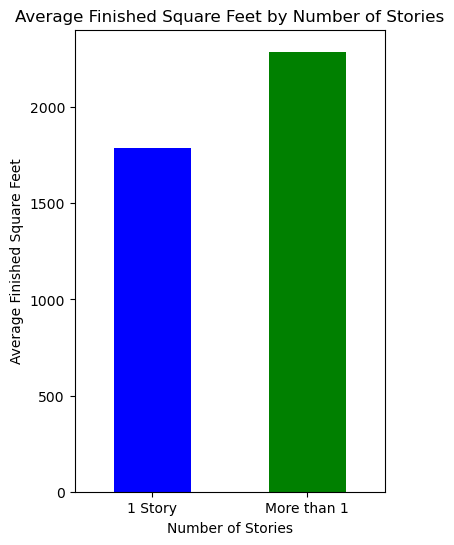

In [25]:
# Compare the average calculatedfinishedsquarefeet for properties with different number of stories using a bar chart
df['StoryCategory'] = df['numberofstories'].apply(lambda x: 'More than 1' if x > 1 else '1 Story')
average_sqft_by_story = df.groupby('StoryCategory')['calculatedfinishedsquarefeet'].mean()

plt.figure(figsize=(4, 6))
average_sqft_by_story.plot(kind='bar', color = ['b', 'g'])
plt.xlabel('Number of Stories')
plt.ylabel('Average Finished Square Feet')
plt.title('Average Finished Square Feet by Number of Stories')
plt.xticks(rotation=0)
plt.show()

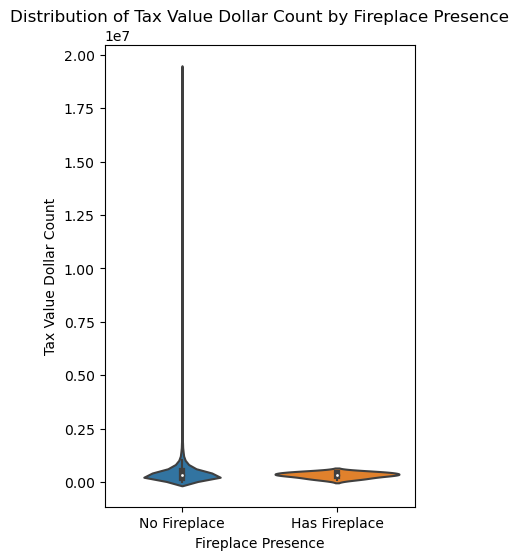

In [26]:
# Compare the taxvaluedollarcnt for properties with and without a fireplace using a violin plot
df['HasFireplace'] = df['fireplaceflag'].apply(lambda x: 'Has Fireplace' if x == 1 else 'No Fireplace')
plt.figure(figsize=(4, 6))
sns.violinplot(x='HasFireplace', y='taxvaluedollarcnt', data=df)
plt.xlabel('Fireplace Presence')
plt.ylabel('Tax Value Dollar Count')
plt.title('Distribution of Tax Value Dollar Count by Fireplace Presence')
plt.show()

## Question 8

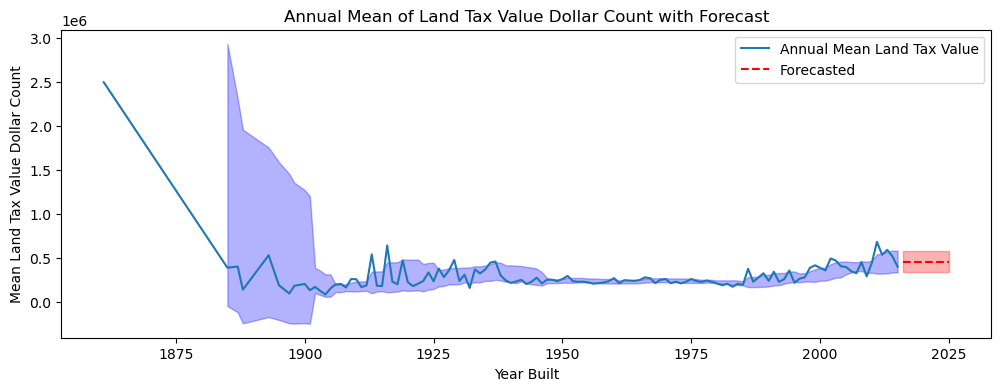

In [27]:
# Group data by 'yearbuilt' and calculate the annual mean of 'landtaxvaluedollarcnt'
annual_mean = df.groupby('yearbuilt')['landtaxvaluedollarcnt'].mean()

# Rolling mean and standard deviation
rolling_mean = annual_mean.rolling(window=10, min_periods=1).mean()
rolling_std = annual_mean.rolling(window=10, min_periods=1).std()

# Forecast plot for the next 10 years
years = np.arange(annual_mean.index.max() + 1, annual_mean.index.max() + 11)
future_mean = np.repeat(rolling_mean.iloc[-1], len(years))
future_std = np.repeat(rolling_std.iloc[-1], len(years))

# Create a plot
plt.figure(figsize=(12, 4))

# Plotting the historical data
plt.plot(annual_mean.index, annual_mean, label='Annual Mean Land Tax Value')
plt.fill_between(annual_mean.index, rolling_mean - rolling_std, rolling_mean + rolling_std, color='blue', alpha=0.3)

# Plotting the forecast
plt.plot(years, future_mean, label='Forecasted', linestyle='--', color='red')
plt.fill_between(years, future_mean - future_std, future_mean + future_std, color='red', alpha=0.3)

plt.xlabel('Year Built')
plt.ylabel('Mean Land Tax Value Dollar Count')
plt.title('Annual Mean of Land Tax Value Dollar Count with Forecast')
plt.legend()
plt.show()

## Question 9

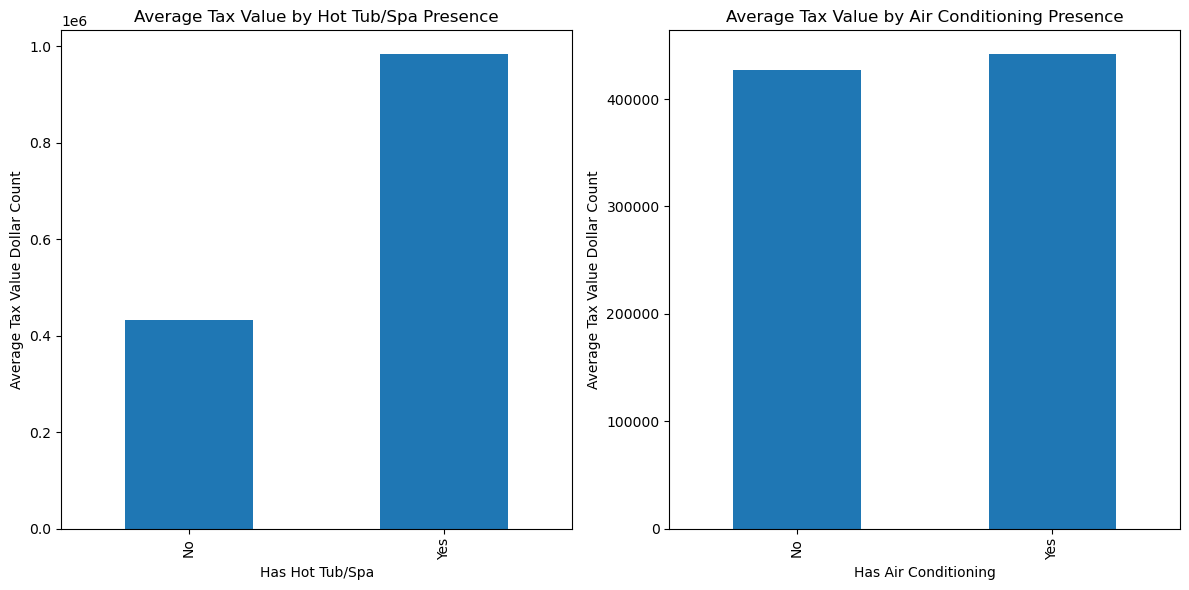

In [29]:
# Create binary features for the presence of hot tub/spa and air conditioning
df['HasHotTubOrSpa'] = df['hashottuborspa'].apply(lambda x: 'Yes' if x == True else 'No')
df['HasAirConditioning'] = df['airconditioningtypeid'].apply(lambda x: 'No' if x == 5 or x is None else 'Yes')

# Calculate average taxvaluedollarcnt for each group
avg_taxval_by_hot_tub = df.groupby('HasHotTubOrSpa')['taxvaluedollarcnt'].mean()
avg_taxval_by_ac = df.groupby('HasAirConditioning')['taxvaluedollarcnt'].mean()

# Plot grouped bar chart
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Plot for hot tub/spa
avg_taxval_by_hot_tub.plot(kind='bar', ax=ax[0])
ax[0].set_title('Average Tax Value by Hot Tub/Spa Presence')
ax[0].set_xlabel('Has Hot Tub/Spa')
ax[0].set_ylabel('Average Tax Value Dollar Count')

# Plot for air conditioning
avg_taxval_by_ac.plot(kind='bar', ax=ax[1])
ax[1].set_title('Average Tax Value by Air Conditioning Presence')
ax[1].set_xlabel('Has Air Conditioning')
ax[1].set_ylabel('Average Tax Value Dollar Count')

plt.tight_layout()
plt.show()

T-statistic: 1.1512717067318656, P-value: 0.24964842071351181


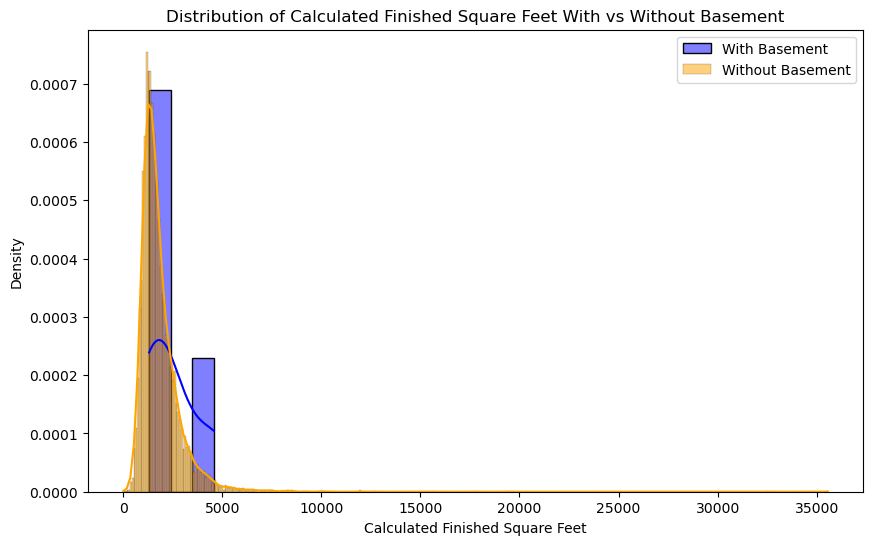

In [30]:
df['HasBasement'] = df['basementsqft'].apply(lambda x: 'Yes' if x > 0 else 'No')

# Perform a hypothesis test
with_basement = df[df['HasBasement'] == 'Yes']['calculatedfinishedsquarefeet']
without_basement = df[df['HasBasement'] == 'No']['calculatedfinishedsquarefeet']
t_stat, p_val = ttest_ind(with_basement.dropna(), without_basement.dropna())

print(f"T-statistic: {t_stat}, P-value: {p_val}")

# Visualize the results using a histogram overlaid with the probability density function
plt.figure(figsize=(10, 6))
sns.histplot(with_basement, color='blue', kde=True, label='With Basement', stat="density")
sns.histplot(without_basement, color='orange', kde=True, label='Without Basement', stat="density")
plt.xlabel('Calculated Finished Square Feet')
plt.ylabel('Density')
plt.title('Distribution of Calculated Finished Square Feet With vs Without Basement')
plt.legend()
plt.show()

## Question 10

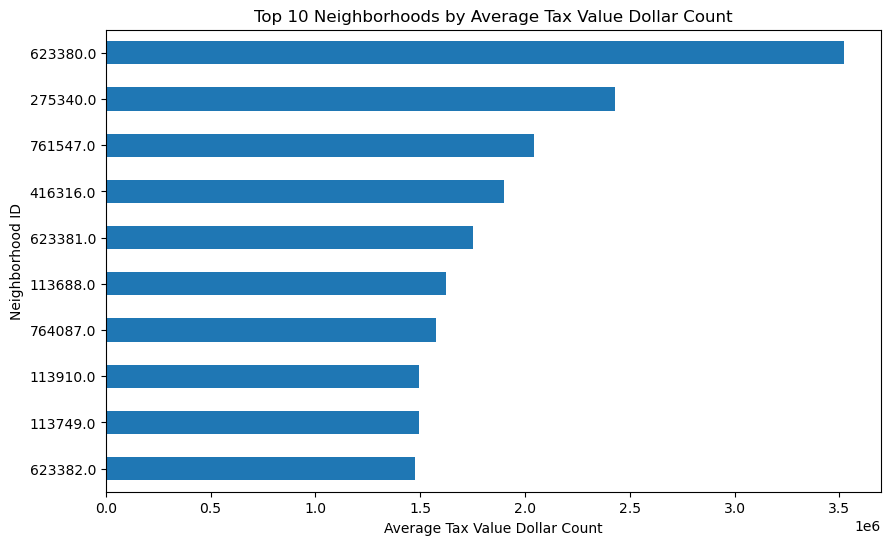

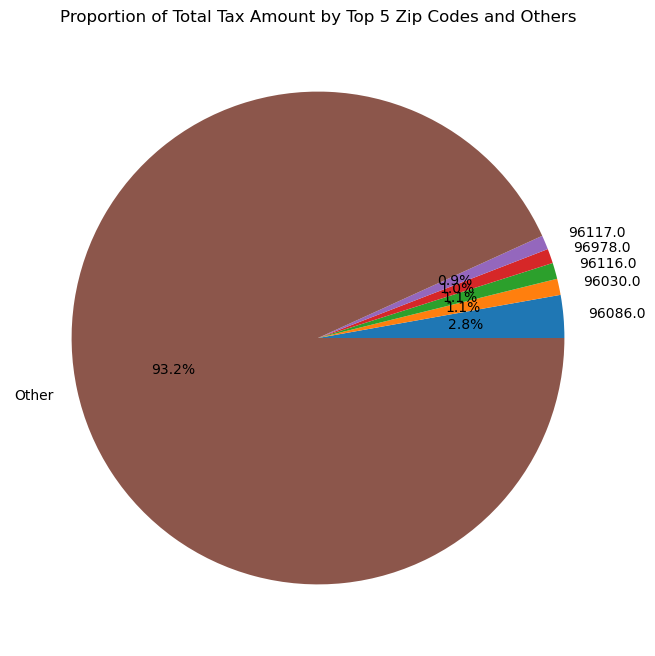

In [31]:
# Group properties by 'regionidneighborhood' and calculate the average 'taxvaluedollarcnt'
avg_taxval_by_neighborhood = df.groupby('regionidneighborhood')['taxvaluedollarcnt'].mean().sort_values(ascending=False)

# Plot a horizontal bar chart for the top 10 neighborhoods
top_10_neighborhoods = avg_taxval_by_neighborhood.head(10)
plt.figure(figsize=(10, 6))
top_10_neighborhoods.plot(kind='barh')
plt.xlabel('Average Tax Value Dollar Count')
plt.ylabel('Neighborhood ID')
plt.title('Top 10 Neighborhoods by Average Tax Value Dollar Count')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest value on top
plt.show()

# Group properties by 'regionidzip' and calculate the total 'taxamount'
total_tax_by_zip = df.groupby('regionidzip')['taxamount'].sum().sort_values(ascending=False)

# Get the top 5 zip codes and the sum of the rest
top_5_zip = total_tax_by_zip.head(5)
other_zip = total_tax_by_zip.iloc[5:].sum()
top_5_zip['Other'] = other_zip

# Plot a pie chart
plt.figure(figsize=(8, 8))
top_5_zip.plot(kind='pie', autopct='%1.1f%%')
plt.title('Proportion of Total Tax Amount by Top 5 Zip Codes and Others')
plt.ylabel('')  # Hide y-label
plt.show()

In [32]:
top_5_zip

regionidzip
96086.0     1495212.79
96030.0      566045.70
96116.0      564857.89
96978.0      507861.38
96117.0      495607.22
Other      49704544.40
Name: taxamount, dtype: float64